In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
from NodeTransformer import NodeTransformer


# Default Bank Data.

In [2]:
data_path='C:/Users/xg16060/OneDrive - APG/dev_data/interestProfile/'
bank_data = pd.read_csv(data_path+'cell2celltrain.csv', sep=',')#d2
bank_data_hold_out = pd.read_csv(data_path+'cell2cellholdout.csv', sep=',')                   

# only select the small sample of the data set
# Set random seed for reproducibility
seed = 7

# Randomly sample 50% of the data
bank_data = bank_data.sample(frac=0.2, random_state=seed)

#bank_data= bank_data.iloc[:,1:]
bank_data.head()


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
5340,3041738,No,37.98,439.0,60.0,0.50,0.0,0.0,-36.0,13.0,...,0,6,No,0,30,No,1-Highest,Suburban,Other,No
542,3004266,No,160.95,1368.0,77.0,16.83,264.0,0.0,-78.0,-15.1,...,0,7,No,2,40,No,1-Highest,Other,Other,Unknown
44528,3352562,No,147.30,1184.0,59.0,16.34,262.0,0.0,816.0,42.5,...,1,0,No,0,80,No,3-Good,Other,Other,Unknown
22830,3179566,No,34.99,340.0,45.0,0.00,0.0,0.0,155.0,0.0,...,0,4,No,0,Unknown,No,2-High,Suburban,Other,Unknown
33863,3269970,No,53.49,608.0,45.0,0.00,26.0,0.0,64.0,14.3,...,0,0,No,0,80,No,7-Lowest,Other,Other,Unknown


In [3]:
bank_data = bank_data.dropna()
bank_data.fillna('unknown', inplace=True)
bank_data
del bank_data['CustomerID']

In [4]:
import numpy as np

#bank_data = pd.read_csv('./adult.data', sep=',' ,header=None) CENSUS DATA

y = bank_data.iloc[:,0]

#student_data = student_data.iloc[:,0:-1]
bank_data = bank_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
bank_data.replace('?',np.nan,inplace=True)

bank_data.dropna(inplace=True)
bank_data= bank_data[(bank_data=='?')==False]



In [5]:
del bank_data['Churn']

object_columns = list(bank_data.columns[bank_data.dtypes=='object'])

In [6]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import *
from sklearn.tree import DecisionTreeClassifier
# import labelencoder
from sklearn.preprocessing import LabelEncoder, StandardScaler# instantiate labelencoder object
from sklearn.ensemble import RandomTreesEmbedding, RandomForestClassifier


le = LabelEncoder()

from sklearn.preprocessing import LabelEncoder
le_dict = {col: LabelEncoder() for col in object_columns }

for col in object_columns:
    bank_data[col] = le_dict[col].fit_transform(bank_data[col])
    
X = bank_data.iloc[:,0:]

y = (y=='Yes').apply(int) #(student_data['target']=='ad.').apply(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0 ,test_size=0.4 )

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, random_state=0 ,test_size=0.8 )

In [7]:
features = np.shape(X_train)[1]
features

56

# Visualization of Decision Tree

# GRID SEARCHES with Node Transformer

In [8]:
%load_ext autoreload
%autoreload 2
seq_number = 50
depth = 5
dimension = 10

In [9]:
# example of usage of NodeTransformer
from NodeTransformer import NodeTransformer

ndt = NodeTransformer(n_estimators=seq_number,dimension=dimension, max_depth=depth, random_state = 0)
ndt.fit(X_train,y_train)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1232.73it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1701.14it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1233.02it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1740.22it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1740.26it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2195.07it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1680.80it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2190.08it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2277.90it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1223.17it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3401.27it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1615.77it/s]


Computing transition probabilities:   0%|          | 0/41 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2335.44it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1624.69it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1945.83it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1798.08it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1858.06it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1588.72it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1650.12it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1917.24it/s]


Computing transition probabilities:   0%|          | 0/41 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2529.13it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2098.39it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2124.56it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1740.82it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1920.38it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 698.16it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1586.49it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1780.84it/s]


Computing transition probabilities:   0%|          | 0/41 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2412.13it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1758.96it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2034.31it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1661.40it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1657.55it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1942.47it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1863.62it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1609.33it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1513.84it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1790.95it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1860.43it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1962.65it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1736.27it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2309.56it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1843.57it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1814.85it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1681.00it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1821.01it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1906.48it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1848.40it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1815.46it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1876.36it/s]


NodeTransformer(dimension=10, n_estimators=50)

In [10]:
X_train_transformed = ndt.transform_matrix(X_train)

print(np.shape(X_train_transformed))

X_test_transformed = ndt.transform_matrix(X_test)
X_val_transformed = ndt.transform_matrix(X_val)

0it [00:00, ?it/s]

C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\xg16060\AppData\Local\miniconda

(5966, 10, 50)


C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\xg16060\AppData\Local\miniconda

0it [00:00, ?it/s]

C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\xg16060\AppData\Local\miniconda

0it [00:00, ?it/s]

C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\xg16060\AppData\Local\miniconda

In [11]:
np.shape(X_val_transformed)

(795, 10, 50)

In [12]:

X_train_transformed = np.transpose(X_train_transformed, (0, 2, 1))
X_test_transformed = np.transpose(X_test_transformed, (0, 2, 1))
X_val_transformed = np.transpose(X_val_transformed, (0, 2, 1))

print(np.shape(X_train_transformed))
print(np.shape(X_test_transformed))

(5966, 50, 10)
(3183, 50, 10)


In [13]:
X_train_transformed[0,2:7,:]

array([[ 0.6441225 , -0.37418142,  0.61094004, -1.3775431 , -0.0021747 ,
        -0.4453916 ,  0.37942168,  0.3798196 , -0.6219211 , -0.43263716],
       [ 0.33439142, -0.3394654 ,  0.74808717, -0.44139293,  0.24002813,
        -0.31487262,  0.5870724 ,  0.18407919, -0.8425036 , -0.74345773],
       [ 0.6666699 ,  0.2815792 ,  0.2493863 , -0.9801609 ,  0.55170035,
        -0.22263262,  0.7259382 ,  0.06909899, -0.69942415,  0.05728866],
       [ 0.02290615,  0.05796609, -0.18860385, -0.6131867 ,  0.58913684,
        -0.03093113,  0.95239633,  0.21135354, -0.51924354,  0.45696867],
       [ 0.3003273 , -0.54962945,  0.3232964 , -1.0217186 ,  0.8448954 ,
         0.49266118,  0.2321817 ,  0.61538774, -0.8415697 , -0.05636366]],
      dtype=float32)

In [14]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from tqdm import tqdm_notebook as tqdm
import pickle

param_grid = {'rfne__n_estimators':[50, 100, 200],
                   'rfne__max_depth':[5],'rfne__dimension' : [10]}

grid_results = []


for i,ii in tqdm(enumerate(param_grid['rfne__n_estimators'])):
    for j,jj in enumerate(param_grid['rfne__max_depth']):
        for k,kk in enumerate(param_grid['rfne__dimension']):
            
            scoring = {'auc': make_scorer(roc_auc_score)}
            estimators = [('scale', StandardScaler()), ('rfne', NodeTransformer(n_estimators=ii,max_depth=jj,dimension=kk)), ('logreg',LogisticRegression())]

            pipe = Pipeline(estimators)
            auc = cross_validate(pipe,X_train,y_train, cv=2, scoring ='roc_auc', n_jobs = 4, verbose=2 ) # 2-->10
            auc['pars'] = [ii,jj,kk]
            print(auc)
            grid_results.append(auc)
            pickle.dump(grid_results, open('grid_res_default_d2.pkl','wb'))


C:\Users\xg16060\AppData\Local\Temp\1\ipykernel_10572\1035396808.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,ii in tqdm(enumerate(param_grid['rfne__n_estimators'])):


0it [00:00, ?it/s]

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    6.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([4.10705495, 3.99817085]), 'score_time': array([0.4722538 , 0.47945023]), 'test_score': array([0.62425335, 0.61055569]), 'pars': [50, 5, 10]}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:   10.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([7.44033742, 7.35451984]), 'score_time': array([1.07438016, 1.09042406]), 'test_score': array([0.60213902, 0.61386062]), 'pars': [100, 5, 10]}
{'fit_time': array([14.16999388, 14.40806985]), 'score_time': array([2.77616048, 2.72818446]), 'test_score': array([0.61153317, 0.60525192]), 'pars': [200, 5, 10]}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:   17.1s finished


In [15]:
import pickle

pickle.dump(grid_results, open('grid_res_d2.pkl','wb'))

In [16]:
grid_results


[{'fit_time': array([4.10705495, 3.99817085]),
  'score_time': array([0.4722538 , 0.47945023]),
  'test_score': array([0.62425335, 0.61055569]),
  'pars': [50, 5, 10]},
 {'fit_time': array([7.44033742, 7.35451984]),
  'score_time': array([1.07438016, 1.09042406]),
  'test_score': array([0.60213902, 0.61386062]),
  'pars': [100, 5, 10]},
 {'fit_time': array([14.16999388, 14.40806985]),
  'score_time': array([2.77616048, 2.72818446]),
  'test_score': array([0.61153317, 0.60525192]),
  'pars': [200, 5, 10]}]

In [17]:
# for combination nodetransformer + logistic regression
for i in grid_results:
    m =np.mean(i['test_score'])
    std = np.std(i['test_score'])
    print(i['pars'],m, '+/-%f'%(std*1.96))
    

[50, 5, 10] 0.6174045231253973 +/-0.013424
[100, 5, 10] 0.6079998197785641 +/-0.011487
[200, 5, 10] 0.6083925453204653 +/-0.006156


# GRID Results Standard Algorithms

In [18]:
# Logistic
from sklearn.linear_model import LogisticRegression
import pickle


grid_resultsl =[]

for P in ['l2']:
    estimatorsl = [('scale', StandardScaler()), ('rfne', LogisticRegression(penalty=P))]
    pipel = Pipeline(estimatorsl)
    auc = cross_validate(pipel,X_train,y_train, cv=2, scoring ='roc_auc', n_jobs = 4, verbose=2 )
    auc['pars'] = P
    grid_resultsl.append(auc) 
    #dump each iteration
    pickle.dump(grid_resultsl, open('grid_res_log_default_d2.pkl','wb'))
    print(auc)

{'fit_time': array([0.02325368, 0.01855707]), 'score_time': array([0.00123477, 0.00911474]), 'test_score': array([0.60685431, 0.5990447 ]), 'pars': 'l2'}


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    0.0s finished


In [19]:
for i in grid_resultsl:
    m =np.mean(i['test_score'])
    std = np.std(i['test_score'])
    print(i['pars'],m, '+/-%f'%(std*1.96))

l2 0.6029495052342522 +/-0.007653


In [20]:
# Knn
from sklearn.neighbors import KNeighborsClassifier
import pickle


grid_resultsk =[]

for k in range(1,11):
    estimatorsk = [('scale', StandardScaler()), ('rfne', KNeighborsClassifier(n_neighbors=k))]
    pipek = Pipeline(estimatorsk)
    auc = cross_validate(pipek,X_train,y_train, cv=2, scoring ='roc_auc', n_jobs = 4, verbose=2 )
    auc['pars'] = k
    grid_resultsk.append(auc) 
    #dump each iteration
    pickle.dump(grid_resultsk, open('grid_res_nn_default_d2.pkl','wb'))
    print(auc)



{'fit_time': array([0.01107383, 0.00665283]), 'score_time': array([0.02220273, 0.03065991]), 'test_score': array([0.51438293, 0.52167508]), 'pars': 1}


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([0.00126004, 0.01008725]), 'score_time': array([0.06083393, 0.05877066]), 'test_score': array([0.50631263, 0.52801274]), 'pars': 2}
{'fit_time': array([0.01018071, 0.01007128]), 'score_time': array([0.04921627, 0.05120373]), 'test_score': array([0.52573014, 0.52790767]), 'pars': 3}
{'fit_time': array([0.01006103, 0.01058483]), 'score_time': array([0.05373931, 0.04938483]), 'test_score': array([0.52544479, 0.54042856]), 'pars': 4}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    0.0s finished


{'fit_time': array([0.01006126, 0.00809431]), 'score_time': array([0.05105376, 0.05300164]), 'test_score': array([0.52050072, 0.53956069]), 'pars': 5}
{'fit_time': array([0.01008129, 0.00804353]), 'score_time': array([0.06225038, 0.06271052]), 'test_score': array([0.53135642, 0.53611125]), 'pars': 6}


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([0.01009226, 0.01006389]), 'score_time': array([0.0603385 , 0.06004095]), 'test_score': array([0.52938735, 0.53575825]), 'pars': 7}
{'fit_time': array([0.00915289, 0.0120132 ]), 'score_time': array([0.05281448, 0.05478191]), 'test_score': array([0.53179439, 0.5417363 ]), 'pars': 8}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    0.0s finished


{'fit_time': array([0.00771785, 0.01165056]), 'score_time': array([0.05195546, 0.05875301]), 'test_score': array([0.53457262, 0.5372174 ]), 'pars': 9}
{'fit_time': array([0.00870657, 0.0101285 ]), 'score_time': array([0.06072927, 0.05260229]), 'test_score': array([0.53565113, 0.53995064]), 'pars': 10}


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    0.0s finished


In [21]:
for i in grid_resultsk:
    m =np.mean(i['test_score'])
    std = np.std(i['test_score'])
    print(i['pars'],m, '+/-%f'%(std*1.96))

1 0.5180290029727809 +/-0.007146
2 0.5171626831612377 +/-0.021266
3 0.5268189066779304 +/-0.002134
4 0.5329366733147275 +/-0.014684
5 0.5300307004548095 +/-0.018679
6 0.5337338357040268 +/-0.004660
7 0.5325728009035311 +/-0.006243
8 0.5367653467914426 +/-0.009743
9 0.53589500875483 +/-0.002592
10 0.537800881400744 +/-0.004214


In [22]:
#random forest
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from tqdm import tqdm_notebook as tqdm
import pickle

param_grid_rf = {'rfne__n_estimators':[ 100, 200],
                   'rfne__max_depth':[ 10,15]}

grid_results_rf = []



for i,ii in tqdm(enumerate(param_grid_rf['rfne__n_estimators'])):
    for j,jj in enumerate(param_grid_rf['rfne__max_depth']):
            
            scoring = {'auc': make_scorer(roc_auc_score)}
            estimators_rf = [('scale', StandardScaler()), ('rf',RandomForestClassifier(n_estimators=ii,max_depth = jj))]

            pipe_rf = Pipeline(estimators_rf)
            auc = cross_validate(pipe_rf,X_train,y_train, cv=2, scoring ='roc_auc', n_jobs = 4, verbose=2 )
            auc['pars'] = [ii,jj]
            grid_results_rf.append(auc) 
            pickle.dump(grid_results_rf, open('grid_results_rf_default_d2.pkl','wb'))
            print(auc)


C:\Users\xg16060\AppData\Local\Temp\1\ipykernel_10572\1011970024.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,ii in tqdm(enumerate(param_grid_rf['rfne__n_estimators'])):


0it [00:00, ?it/s]

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([0.39607954, 0.40132952]), 'score_time': array([0.02052236, 0.02058864]), 'test_score': array([0.64540399, 0.64838808]), 'pars': [100, 10]}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([0.54158425, 0.54827452]), 'score_time': array([0.03103542, 0.03104305]), 'test_score': array([0.64738134, 0.65246243]), 'pars': [100, 15]}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([0.8012054 , 0.80425715]), 'score_time': array([0.04031992, 0.04238939]), 'test_score': array([0.65313567, 0.64892584]), 'pars': [200, 10]}
{'fit_time': array([1.02012992, 1.02606893]), 'score_time': array([0.05657649, 0.05243659]), 'test_score': array([0.65053931, 0.6401401 ]), 'pars': [200, 15]}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    1.0s finished


In [23]:
for i in grid_results_rf:
    m =np.mean(i['test_score'])
    std = np.std(i['test_score'])
    print(i['pars'],m, '+/-%f'%(std*1.96))

[100, 10] 0.6468960311958774 +/-0.002924
[100, 15] 0.6499218823639613 +/-0.004979
[200, 10] 0.6510307565152842 +/-0.004126
[200, 15] 0.6453397017378297 +/-0.010191


In [24]:
# Testing

from sklearn.neighbors import KNeighborsClassifier
estimatorsk = [('scale', StandardScaler()), ('rfne', KNeighborsClassifier(n_neighbors=10))]
pipek = Pipeline(estimatorsk)

pipek.fit(X_train,y_train)
                                                                                         
print(roc_auc_score(y_test, pipek.predict_proba(X_test)[:,1]))                                                                           
            

0.543365920376222


# SVM model with its grid search on the parameters

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix ,make_scorer, roc_auc_score
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm_notebook as tqdm
import pickle

param_grid_svm = { 'C':[0.1,1,10],'kernel':['linear','rbf'],
             'gamma': [1, 0.1, 0.01]}

# param_grid_svm = { 'C':[0.1,1,100,1000],'kernel':['rbf','sigmoid','linear'],
#                   'gamma': [1, 0.1, 0.01, 0.001, 0.0001],}

grid_results_svm =[]
for i,ii in tqdm(enumerate(param_grid_svm['C'])):
    for j,jj in enumerate(param_grid_svm['kernel']):
        for w,ww in enumerate(param_grid_svm['gamma']):
            scoring = {'auc': make_scorer(roc_auc_score)}
            estimators_svm = [('scale', StandardScaler()), 
                             ('svm',SVC(C=ii, gamma=ww, kernel=jj, random_state=123))]

            pipe_svm = Pipeline(estimators_svm)
            auc = cross_validate(pipe_svm,X_train,y_train, cv=2, scoring ='roc_auc', n_jobs = 4, verbose=2 )
            auc['pars'] = [ii,jj,ww]
            grid_results_svm.append(auc) 
            pickle.dump(grid_results_svm, open('grid_results_svm_default_d2.pkl','wb'))
            print(auc)

C:\Users\xg16060\AppData\Local\Temp\1\ipykernel_10572\2839866536.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,ii in tqdm(enumerate(param_grid_svm['C'])):


0it [00:00, ?it/s]

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([0.19607377, 0.236413  ]), 'score_time': array([0.12158132, 0.12393188]), 'test_score': array([0.51791236, 0.51875017]), 'pars': [0.1, 'linear', 1]}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([0.19096708, 0.22339368]), 'score_time': array([0.12092948, 0.12283468]), 'test_score': array([0.51791236, 0.51875017]), 'pars': [0.1, 'linear', 0.1]}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([0.19478559, 0.22774982]), 'score_time': array([0.12192822, 0.12001991]), 'test_score': array([0.51791236, 0.51875017]), 'pars': [0.1, 'linear', 0.01]}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([0.31665349, 0.29989696]), 'score_time': array([0.68321776, 0.70386577]), 'test_score': array([0.50898405, 0.51378699]), 'pars': [0.1, 'rbf', 1]}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([0.30181026, 0.28883719]), 'score_time': array([0.64206481, 0.62730932]), 'test_score': array([0.54914156, 0.55422217]), 'pars': [0.1, 'rbf', 0.1]}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([0.25971961, 0.2570796 ]), 'score_time': array([0.4641006, 0.4554038]), 'test_score': array([0.56056687, 0.56633794]), 'pars': [0.1, 'rbf', 0.01]}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([0.3734417, 0.7548635]), 'score_time': array([0.1545465 , 0.13554406]), 'test_score': array([0.46946957, 0.52919942]), 'pars': [1, 'linear', 1]}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([0.37622952, 0.77947211]), 'score_time': array([0.15519023, 0.1411562 ]), 'test_score': array([0.46946957, 0.52919942]), 'pars': [1, 'linear', 0.1]}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([0.37981486, 0.78319049]), 'score_time': array([0.15809703, 0.13920498]), 'test_score': array([0.46946957, 0.52919942]), 'pars': [1, 'linear', 0.01]}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([0.31085157, 0.3181026 ]), 'score_time': array([0.66328073, 0.66329837]), 'test_score': array([0.50925865, 0.51399824]), 'pars': [1, 'rbf', 1]}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([0.31580949, 0.32262921]), 'score_time': array([0.64077568, 0.64330196]), 'test_score': array([0.54933336, 0.55354182]), 'pars': [1, 'rbf', 0.1]}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([0.28125668, 0.27404547]), 'score_time': array([0.48884511, 0.4669683 ]), 'test_score': array([0.56164814, 0.56663137]), 'pars': [1, 'rbf', 0.01]}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:  2.8min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([170.21189189, 133.67633867]), 'score_time': array([0.15736842, 0.15188789]), 'test_score': array([0.53739445, 0.50421996]), 'pars': [10, 'linear', 1]}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:  2.7min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([164.72510862, 129.92737842]), 'score_time': array([0.15092802, 0.15005231]), 'test_score': array([0.53739445, 0.50421996]), 'pars': [10, 'linear', 0.1]}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:  2.8min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([167.2522285 , 133.16686678]), 'score_time': array([0.15344548, 0.15422988]), 'test_score': array([0.53739445, 0.50421996]), 'pars': [10, 'linear', 0.01]}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([0.37004209, 0.37045979]), 'score_time': array([0.71314478, 0.69240737]), 'test_score': array([0.50929783, 0.51335595]), 'pars': [10, 'rbf', 1]}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([0.36446428, 0.36785173]), 'score_time': array([0.63780928, 0.64450717]), 'test_score': array([0.54144575, 0.54465018]), 'pars': [10, 'rbf', 0.1]}
{'fit_time': array([0.36055279, 0.35387135]), 'score_time': array([0.49393559, 0.49747539]), 'test_score': array([0.55547516, 0.56410413]), 'pars': [10, 'rbf', 0.01]}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    0.8s finished


In [26]:
for i in grid_results_svm:
    m =np.mean(i['test_score'])
    std = np.std(i['test_score'])
    print(i['pars'],m, '+/-%f'%(std*1.96))

[0.1, 'linear', 1] 0.5183312648484097 +/-0.000821
[0.1, 'linear', 0.1] 0.5183312648484097 +/-0.000821
[0.1, 'linear', 0.01] 0.5183312648484097 +/-0.000821
[0.1, 'rbf', 1] 0.5113855204000991 +/-0.004707
[0.1, 'rbf', 0.1] 0.5516818614372625 +/-0.004979
[0.1, 'rbf', 0.01] 0.5634524055773591 +/-0.005656
[1, 'linear', 1] 0.4993344913059111 +/-0.058535
[1, 'linear', 0.1] 0.4993344913059111 +/-0.058535
[1, 'linear', 0.01] 0.4993344913059111 +/-0.058535
[1, 'rbf', 1] 0.5116284405012116 +/-0.004645
[1, 'rbf', 0.1] 0.551437589705519 +/-0.004124
[1, 'rbf', 0.01] 0.5641397524086248 +/-0.004884
[10, 'linear', 1] 0.5208072073243128 +/-0.032511
[10, 'linear', 0.1] 0.5208072073243128 +/-0.032511
[10, 'linear', 0.01] 0.5208072073243128 +/-0.032511
[10, 'rbf', 1] 0.5113268907143211 +/-0.003977
[10, 'rbf', 0.1] 0.5430479623679733 +/-0.003140
[10, 'rbf', 0.01] 0.5597896445490338 +/-0.008456


## ANN with its grid search on the parameters

In [27]:
# 2 layers ANN model

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import  GridSearchCV,RepeatedStratifiedKFold
#from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from keras.optimizers import SGD
import numpy as np
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

def create_model(learn_rate, momentum):
    #create a model
    model=Sequential()
    model.add(Dense(24,input_dim=56,activation='relu'))
    model.add(Dense(24,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    #compile model
    optimizer = SGD(learning_rate=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

#creat a model
model=KerasClassifier(build_fn=create_model, verbose=0)

# learn_rate = [0.001, 0.01, 0.1, 0.2]
# momentum = [0.0, 0.2, 0.4, 0.6, 0.8 ]
learn_rate = [0.001, 0.01]
momentum = [0.0, 0.2]
param_grid_ann = dict(model__learn_rate=learn_rate, model__momentum=momentum)

cv_sk = RepeatedStratifiedKFold(n_splits = 2, n_repeats = 3)#n_splits = 10
grid=GridSearchCV(estimator=model, param_grid=param_grid_ann, n_jobs=-1,cv=cv_sk)
grid_result = grid.fit(X_train, y_train)



C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.714940 using {'model__learn_rate': 0.01, 'model__momentum': 0.0}
0.586769 (0.118848) with: {'model__learn_rate': 0.001, 'model__momentum': 0.0}
0.600961 (0.098643) with: {'model__learn_rate': 0.001, 'model__momentum': 0.2}
0.714940 (0.000316) with: {'model__learn_rate': 0.01, 'model__momentum': 0.0}
0.712538 (0.002588) with: {'model__learn_rate': 0.01, 'model__momentum': 0.2}


## Apply optimized parameters

In [29]:
#random forest
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score,accuracy_score
from tqdm import tqdm_notebook as tqdm

estimators_rf = [('scale', StandardScaler()), ('rf',RandomForestClassifier(n_estimators=200,max_depth = 10))]
pipe_rf = Pipeline(estimators_rf)
                  
pipe_rf.fit(X_train,y_train)
                                                                           
print(roc_auc_score(y_test, pipe_rf.predict_proba(X_test)[:,1]))

0.656585280871948


In [30]:
y_pre=pipe_rf.predict(X_test)
print(accuracy_score(y_test, y_pre ))
print(classification_report(y_test, y_pre ))  

0.7150486961985548
              precision    recall  f1-score   support

           0       0.72      1.00      0.83      2266
           1       0.68      0.02      0.04       917

    accuracy                           0.72      3183
   macro avg       0.70      0.51      0.44      3183
weighted avg       0.70      0.72      0.60      3183



In [31]:
from sklearn.ensemble import ExtraTreesClassifier

estimators_erf = [('scale', StandardScaler()), ('rf',ExtraTreesClassifier(n_estimators=200,max_depth = 20))]
pipe_erf = Pipeline(estimators_erf)
                  
pipe_erf.fit(X_train,y_train)
                                                                           
print(roc_auc_score(y_test, pipe_erf.predict_proba(X_test)[:,1]))

0.608691279075923


In [32]:
y_pre=pipe_erf.predict(X_test)
print(accuracy_score(y_test, y_pre ))
print(classification_report(y_test, y_pre ))  

0.7097078228086711
              precision    recall  f1-score   support

           0       0.71      0.99      0.83      2266
           1       0.39      0.01      0.03       917

    accuracy                           0.71      3183
   macro avg       0.55      0.50      0.43      3183
weighted avg       0.62      0.71      0.60      3183



In [33]:
# Testing
from sklearn.neighbors import KNeighborsClassifier
estimatorsk = [('scale', StandardScaler()), ('rfne', KNeighborsClassifier(n_neighbors=10))]
pipek = Pipeline(estimatorsk)
    


pipek.fit(X_train,y_train)
                                                                                         
print(roc_auc_score(y_test, pipek.predict_proba(X_test)[:,1])) 


0.543365920376222


In [34]:
y_pre=pipek.predict(X_test)
print(accuracy_score(y_test, y_pre ))
print(classification_report(y_test, y_pre )) 

0.6980835689601005
              precision    recall  f1-score   support

           0       0.71      0.96      0.82      2266
           1       0.33      0.05      0.08       917

    accuracy                           0.70      3183
   macro avg       0.52      0.50      0.45      3183
weighted avg       0.60      0.70      0.61      3183



In [35]:
#testing for SVM

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix 

scaler =  StandardScaler()
 
model_svm=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
 
X_train_transformed =scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)
 
model_svm.fit(X_train_transformed,y_train)
y_pred = model_svm.predict(X_test_transformed)
print(confusion_matrix(y_test,y_pred))
 
from sklearn.metrics import roc_curve
roc = roc_curve(y_test,model_svm.predict_proba(X_test)[:,1])
print(roc)
print(accuracy_score(y_test, y_pre ))
print(classification_report(y_test, y_pre ))

[[2145  121]
 [ 850   67]]


C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


(array([0., 1.]), array([0., 1.]), array([       inf, 0.33166906]))
0.6980835689601005
              precision    recall  f1-score   support

           0       0.71      0.96      0.82      2266
           1       0.33      0.05      0.08       917

    accuracy                           0.70      3183
   macro avg       0.52      0.50      0.45      3183
weighted avg       0.60      0.70      0.61      3183



In [36]:
estimatorsl = [('scale', StandardScaler()), ('rfne', LogisticRegression(penalty='l2'))]
pipel = Pipeline(estimatorsl)

pipel.fit(X_train,y_train)

print(roc_auc_score(y_test, pipel.predict_proba(X_test)[:,1]))

0.5889889033370839


In [37]:
y_pre=pipel.predict(X_test)
print(accuracy_score(y_test, y_pre ))
print(classification_report(y_test, y_pre ))  

0.7103361608545398
              precision    recall  f1-score   support

           0       0.72      0.98      0.83      2266
           1       0.47      0.04      0.07       917

    accuracy                           0.71      3183
   macro avg       0.59      0.51      0.45      3183
weighted avg       0.65      0.71      0.61      3183



In [38]:
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import MinMaxScaler

estimatorsl = [('scale', MinMaxScaler()), ('rfne', ComplementNB())]
pipel = Pipeline(estimatorsl)

pipel.fit(X_train,y_train)

print(roc_auc_score(y_test, pipel.predict_proba(X_test)[:,1]))

0.5542623832848395


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
estimators = [('scale', StandardScaler()), ('rfne', NodeTransformer(n_estimators=50,max_depth=5,dimension=50)), ('logreg',LogisticRegression(max_iter=1000))]
rfne_pipe = Pipeline(estimators)

rfne_pipe.fit(X_train,y_train)   

print(roc_auc_score(y_test, rfne_pipe.predict_proba(X_test)[:,1]))


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1676.45it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1624.45it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1524.16it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1618.42it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1625.51it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1769.81it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1445.95it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1782.40it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1907.20it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1743.86it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1638.96it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1585.23it/s]


Computing transition probabilities:   0%|          | 0/41 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2294.08it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1596.15it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1835.45it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1481.91it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1571.88it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1489.58it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1557.13it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1909.87it/s]


Computing transition probabilities:   0%|          | 0/41 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2431.62it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2056.96it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2113.83it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1692.43it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1924.95it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1656.31it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1570.34it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1663.31it/s]


Computing transition probabilities:   0%|          | 0/41 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1923.34it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1693.41it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1855.90it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1396.91it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 303.30it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2060.29it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1917.33it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1623.03it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1637.03it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1539.02it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1500.42it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1608.29it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1409.24it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2272.25it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1661.93it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1822.30it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1698.57it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1665.44it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1803.75it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1425.95it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1539.05it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1137.95it/s]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0.6256960078386004


In [40]:
y_pre=rfne_pipe.predict(X_test)
print(accuracy_score(y_test, y_pre ))
print(classification_report(y_test, y_pre )) 

0it [00:00, ?it/s]

0.6933710336160854
              precision    recall  f1-score   support

           0       0.74      0.89      0.80      2266
           1       0.44      0.22      0.29       917

    accuracy                           0.69      3183
   macro avg       0.59      0.55      0.55      3183
weighted avg       0.65      0.69      0.66      3183



In [41]:
# 2 layers ANN model with best hyperparameters

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import  GridSearchCV,RepeatedStratifiedKFold
#from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from keras.optimizers import SGD
import numpy as np
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)


model=Sequential()
model.add(Dense(12,input_dim=56,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
#compile model
optimizer = SGD(learning_rate=0.001, momentum=0.0)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
# Fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)#epochs=150

#history = model.fit(X_train, y_train, validation_split=0.33, epochs=50, batch_size=10, verbose=1)
#history = model.fit(X_train, Y_train, batch_size=32, epochs=100,validation_data=(X_val, Y_val))#specify the validation set
# list all data in history

print(history.history.keys())


Epoch 1/50


C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


597/597 ━━━━━━━━━━━━━━━━━━━━ 1s 573us/step - accuracy: 0.6348 - loss: 1.6008
Epoch 2/50
597/597 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.7020 - loss: 0.6516
Epoch 3/50
597/597 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.7137 - loss: 0.6337
Epoch 4/50
597/597 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.7145 - loss: 0.6227
Epoch 5/50
597/597 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.7123 - loss: 0.6204
Epoch 6/50
597/597 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.7251 - loss: 0.6120
Epoch 7/50
597/597 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.7104 - loss: 0.6156
Epoch 8/50
597/597 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.7129 - loss: 0.6090
Epoch 9/50
597/597 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.7146 - loss: 0.6019
Epoch 10/50
597/597 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.7195 - loss: 0.5989
Epoch 11/50
597/597 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.7135 - loss: 0.6012
Epoch 12/50
597/597 ━━━━━━━━━━━━━━━━━━━━ 

              precision    recall  f1-score   support

           0       0.71      1.00      0.83      2266
           1       0.00      0.00      0.00       917

    accuracy                           0.71      3183
   macro avg       0.36      0.50      0.42      3183
weighted avg       0.51      0.71      0.59      3183

AUC :  0.5104876410182865


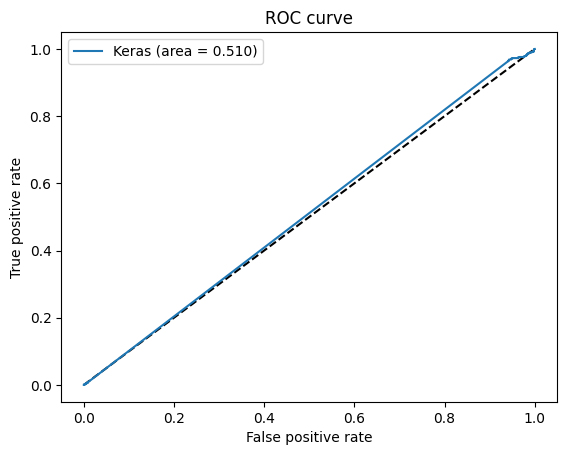

In [42]:
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Ensure inline plotting in Jupyter Notebook
%matplotlib inline

# Get predicted probabilities
y_pred_prob = model.predict(X_test, verbose=0)

# Convert probabilities to class labels (assuming binary classification)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Print classification report
print(classification_report(y_test, y_pred))

# Compute ROC curve
fpr, tpr, thresholds_keras = roc_curve(y_test, y_pred_prob)

# Compute AUC
roc_auc = auc(fpr, tpr)
print("AUC : ", roc_auc)

# Plotting the ROC curve
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(roc_auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
# plt.savefig("../images/ROC/ROC_d3.png")
plt.show()


In [43]:
from NodeTransformerExtremeTrees import NodeTransformerExtremeTrees

estimators = [('scale', StandardScaler()), ('rfne', NodeTransformerExtremeTrees(n_estimators=200,max_depth=7,dimension=10)), ('logreg',LogisticRegression())]
pipee = Pipeline(estimators)

pipee.fit(X_train,y_train)   

print(roc_auc_score(y_test, pipee.predict_proba(X_test)[:,1]))

y_pre=pipee.predict(X_test)
print(accuracy_score(y_test, y_pre ))
print(classification_report(y_test, y_pre )) 

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 654.28it/s]


Computing transition probabilities:   0%|          | 0/40 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 867.50it/s]


Computing transition probabilities:   0%|          | 0/58 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 637.43it/s]


Computing transition probabilities:   0%|          | 0/86 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 311.92it/s]


Computing transition probabilities:   0%|          | 0/64 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 493.75it/s]


Computing transition probabilities:   0%|          | 0/54 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 743.18it/s]


Computing transition probabilities:   0%|          | 0/30 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1822.60it/s]


Computing transition probabilities:   0%|          | 0/44 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1047.10it/s]


Computing transition probabilities:   0%|          | 0/60 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 609.32it/s]


Computing transition probabilities:   0%|          | 0/84 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 372.26it/s]


Computing transition probabilities:   0%|          | 0/54 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 790.69it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1020.69it/s]


Computing transition probabilities:   0%|          | 0/38 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1121.24it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 312.71it/s]


Computing transition probabilities:   0%|          | 0/56 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 639.68it/s]


Computing transition probabilities:   0%|          | 0/46 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 895.98it/s]


Computing transition probabilities:   0%|          | 0/86 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 349.49it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 239.02it/s]


Computing transition probabilities:   0%|          | 0/68 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 335.23it/s]


Computing transition probabilities:   0%|          | 0/48 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 773.68it/s]


Computing transition probabilities:   0%|          | 0/39 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1148.60it/s]


Computing transition probabilities:   0%|          | 0/78 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 439.64it/s]


Computing transition probabilities:   0%|          | 0/40 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1452.18it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1020.36it/s]


Computing transition probabilities:   0%|          | 0/67 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 571.36it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 446.69it/s]


Computing transition probabilities:   0%|          | 0/40 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1226.82it/s]


Computing transition probabilities:   0%|          | 0/54 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 797.00it/s]


Computing transition probabilities:   0%|          | 0/86 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 371.50it/s]


Computing transition probabilities:   0%|          | 0/46 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1203.32it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 789.24it/s]


Computing transition probabilities:   0%|          | 0/39 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1314.52it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 606.77it/s]


Computing transition probabilities:   0%|          | 0/44 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 992.13it/s]


Computing transition probabilities:   0%|          | 0/86 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 367.63it/s]


Computing transition probabilities:   0%|          | 0/78 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 406.57it/s]


Computing transition probabilities:   0%|          | 0/72 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 460.62it/s]


Computing transition probabilities:   0%|          | 0/56 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 665.52it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 226.27it/s]


Computing transition probabilities:   0%|          | 0/46 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1024.69it/s]


Computing transition probabilities:   0%|          | 0/54 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 763.64it/s]


Computing transition probabilities:   0%|          | 0/42 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1060.48it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 934.52it/s]


Computing transition probabilities:   0%|          | 0/21 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1744.36it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1009.64it/s]


Computing transition probabilities:   0%|          | 0/71 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 367.91it/s]


Computing transition probabilities:   0%|          | 0/60 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 629.40it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 756.84it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 925.37it/s]


Computing transition probabilities:   0%|          | 0/36 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1519.06it/s]


Computing transition probabilities:   0%|          | 0/39 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1325.35it/s]


Computing transition probabilities:   0%|          | 0/67 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 547.47it/s]


Computing transition probabilities:   0%|          | 0/38 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1237.37it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 397.15it/s]


Computing transition probabilities:   0%|          | 0/48 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 997.62it/s]


Computing transition probabilities:   0%|          | 0/58 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 659.87it/s]


Computing transition probabilities:   0%|          | 0/48 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 955.40it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 399.01it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 970.99it/s]


Computing transition probabilities:   0%|          | 0/39 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1218.11it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 410.86it/s]


Computing transition probabilities:   0%|          | 0/60 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 662.19it/s]


Computing transition probabilities:   0%|          | 0/52 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 820.83it/s]


Computing transition probabilities:   0%|          | 0/66 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 567.38it/s]


Computing transition probabilities:   0%|          | 0/82 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 389.54it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1171.82it/s]


Computing transition probabilities:   0%|          | 0/60 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 702.02it/s]


Computing transition probabilities:   0%|          | 0/30 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1867.59it/s]


Computing transition probabilities:   0%|          | 0/32 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1498.04it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1165.27it/s]


Computing transition probabilities:   0%|          | 0/54 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 803.81it/s]


Computing transition probabilities:   0%|          | 0/62 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 700.35it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 947.51it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 828.44it/s]


Computing transition probabilities:   0%|          | 0/58 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 808.21it/s]


Computing transition probabilities:   0%|          | 0/42 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1278.70it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 697.80it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 403.96it/s]


Computing transition probabilities:   0%|          | 0/48 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 812.06it/s]


Computing transition probabilities:   0%|          | 0/72 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 502.12it/s]


Computing transition probabilities:   0%|          | 0/67 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 605.02it/s]


Computing transition probabilities:   0%|          | 0/23 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2220.62it/s]


Computing transition probabilities:   0%|          | 0/62 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 671.72it/s]


Computing transition probabilities:   0%|          | 0/71 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 473.16it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 377.84it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 813.27it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1049.70it/s]


Computing transition probabilities:   0%|          | 0/38 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1047.47it/s]


Computing transition probabilities:   0%|          | 0/20 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2378.26it/s]


Computing transition probabilities:   0%|          | 0/72 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 467.18it/s]


Computing transition probabilities:   0%|          | 0/29 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1546.57it/s]


Computing transition probabilities:   0%|          | 0/50 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 724.45it/s]


Computing transition probabilities:   0%|          | 0/78 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 130.06it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 997.22it/s]


Computing transition probabilities:   0%|          | 0/37 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1634.89it/s]


Computing transition probabilities:   0%|          | 0/74 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 251.27it/s]


Computing transition probabilities:   0%|          | 0/44 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 748.72it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 271.31it/s]


Computing transition probabilities:   0%|          | 0/50 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 500.28it/s]


Computing transition probabilities:   0%|          | 0/31 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 963.76it/s]


Computing transition probabilities:   0%|          | 0/76 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 356.76it/s]


Computing transition probabilities:   0%|          | 0/29 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1541.26it/s]


Computing transition probabilities:   0%|          | 0/82 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 348.05it/s]


Computing transition probabilities:   0%|          | 0/38 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1629.93it/s]


Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1288.87it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 786.68it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|████████████████████████████████████████████████████| 50/50 [00:00<00:00, 16054.14it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 992.39it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 360.80it/s]


Computing transition probabilities:   0%|          | 0/62 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 607.48it/s]


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 4016.84it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 369.96it/s]


Computing transition probabilities:   0%|          | 0/29 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2107.84it/s]


Computing transition probabilities:   0%|          | 0/54 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 748.73it/s]


Computing transition probabilities:   0%|          | 0/62 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 506.11it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 704.28it/s]


Computing transition probabilities:   0%|          | 0/46 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 981.75it/s]


Computing transition probabilities:   0%|          | 0/82 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 390.48it/s]


Computing transition probabilities:   0%|          | 0/38 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1549.01it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 447.93it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 984.79it/s]


Computing transition probabilities:   0%|          | 0/68 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 413.16it/s]


Computing transition probabilities:   0%|          | 0/33 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1707.70it/s]


Computing transition probabilities:   0%|          | 0/62 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 624.82it/s]


Computing transition probabilities:   0%|          | 0/33 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1696.63it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 948.29it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 957.84it/s]


Computing transition probabilities:   0%|          | 0/74 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 417.06it/s]


Computing transition probabilities:   0%|          | 0/38 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1296.19it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 800.01it/s]


Computing transition probabilities:   0%|          | 0/74 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 426.24it/s]


Computing transition probabilities:   0%|          | 0/48 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 851.15it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 985.70it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1108.33it/s]


Computing transition probabilities:   0%|          | 0/42 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1138.30it/s]


Computing transition probabilities:   0%|          | 0/67 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 499.48it/s]


Computing transition probabilities:   0%|          | 0/74 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 456.07it/s]


Computing transition probabilities:   0%|          | 0/40 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1178.17it/s]


Computing transition probabilities:   0%|          | 0/60 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 613.55it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1171.99it/s]


Computing transition probabilities:   0%|          | 0/70 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 494.25it/s]


Computing transition probabilities:   0%|          | 0/68 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 548.86it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 377.97it/s]


Computing transition probabilities:   0%|          | 0/48 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 978.81it/s]


Computing transition probabilities:   0%|          | 0/60 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 705.04it/s]


Computing transition probabilities:   0%|          | 0/52 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 820.61it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1172.78it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 878.96it/s]


Computing transition probabilities:   0%|          | 0/92 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 295.12it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 412.48it/s]


Computing transition probabilities:   0%|          | 0/65 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 619.40it/s]


Computing transition probabilities:   0%|          | 0/72 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 421.06it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 353.72it/s]


Computing transition probabilities:   0%|          | 0/65 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 496.71it/s]


Computing transition probabilities:   0%|          | 0/38 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1227.73it/s]


Computing transition probabilities:   0%|          | 0/37 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1211.78it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3200.00it/s]


Computing transition probabilities:   0%|          | 0/58 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 724.47it/s]


Computing transition probabilities:   0%|          | 0/50 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 936.33it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 590.72it/s]


Computing transition probabilities:   0%|          | 0/70 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 496.27it/s]


Computing transition probabilities:   0%|          | 0/29 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1599.50it/s]


Computing transition probabilities:   0%|          | 0/37 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1066.66it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 314.81it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 487.35it/s]


Computing transition probabilities:   0%|          | 0/39 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1230.83it/s]


Computing transition probabilities:   0%|          | 0/64 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 615.85it/s]


Computing transition probabilities:   0%|          | 0/73 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 449.00it/s]


Computing transition probabilities:   0%|          | 0/64 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 683.67it/s]


Computing transition probabilities:   0%|          | 0/30 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1648.78it/s]


Computing transition probabilities:   0%|          | 0/22 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2480.22it/s]


Computing transition probabilities:   0%|          | 0/54 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 821.20it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 821.28it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 431.47it/s]


Computing transition probabilities:   0%|          | 0/52 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 822.39it/s]


Computing transition probabilities:   0%|          | 0/36 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1542.39it/s]


Computing transition probabilities:   0%|          | 0/28 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2462.37it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 412.08it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 516.72it/s]


Computing transition probabilities:   0%|          | 0/66 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 617.91it/s]


Computing transition probabilities:   0%|          | 0/64 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 683.37it/s]


Computing transition probabilities:   0%|          | 0/66 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 616.42it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 985.34it/s]


Computing transition probabilities:   0%|          | 0/44 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1030.47it/s]


Computing transition probabilities:   0%|          | 0/36 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1652.50it/s]


Computing transition probabilities:   0%|          | 0/67 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 547.85it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 380.46it/s]


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 4959.33it/s]


Computing transition probabilities:   0%|          | 0/50 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 836.44it/s]


Computing transition probabilities:   0%|          | 0/46 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 985.55it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 952.42it/s]


Computing transition probabilities:   0%|          | 0/37 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1544.76it/s]


Computing transition probabilities:   0%|          | 0/31 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2251.52it/s]


Computing transition probabilities:   0%|          | 0/50 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 824.14it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 314.21it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 778.43it/s]


Computing transition probabilities:   0%|          | 0/56 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 750.88it/s]


Computing transition probabilities:   0%|          | 0/84 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 341.49it/s]


Computing transition probabilities:   0%|          | 0/58 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 730.53it/s]


Computing transition probabilities:   0%|          | 0/33 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1364.47it/s]


0it [00:00, ?it/s]

C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0it [00:00, ?it/s]

0.591053465914505


0it [00:00, ?it/s]

0.6943135406848885
              precision    recall  f1-score   support

           0       0.72      0.93      0.81      2266
           1       0.38      0.10      0.16       917

    accuracy                           0.69      3183
   macro avg       0.55      0.52      0.49      3183
weighted avg       0.62      0.69      0.63      3183



In [44]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.optimizers import SGD
# import numpy as np
# from scikeras.wrappers import KerasClassifier

# # Fix random seed for reproducibility
# seed = 7
# np.random.seed(seed)

# # Function to create model, required for KerasClassifier
# def create_model():
#     # Create model
#     model = Sequential()
#     model.add(Dense(12, input_dim=56, activation='relu'))
#     model.add(Dense(12, activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))
    
#     # Compile model
#     optimizer = SGD(learning_rate=0.001, momentum=0.0)
#     model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
#     return model

# # Wrap the model using KerasClassifier
# ann_model = KerasClassifier(model=create_model, epochs=50, batch_size=10, verbose=1)

# # Fit the model
# ann_model.fit(X_train, y_train)


## Paired t test

In [45]:
# from sklearn.model_selection import cross_val_score
# from numpy import mean, std
# from mlxtend.evaluate import paired_ttest_5x2cv

# # check if difference between algorithms is real
# t, p = paired_ttest_5x2cv(estimator1=rfne_pipe, estimator2=ann_model, X=X_test,y=y_test, scoring='roc_auc', random_seed=123)
# #t, p = paired_ttest_5x2cv(estimator1=pipe_rf, estimator2=pipek,X=X_train,y=y_train, scoring='accuracy', random_seed=1)#0.001 t-statistic 7.651

# # summarize
# print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

In [46]:
#RFNE VS RF
from mlxtend.evaluate import paired_ttest_5x2cv
# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=rfne_pipe, estimator2=pipe_rf,X=X_train,y=y_train, scoring='accuracy', random_seed=1)

# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1749.10it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1799.40it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1768.44it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2004.58it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1935.30it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1620.29it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1729.05it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2566.61it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1656.09it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1673.45it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1596.13it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2085.51it/s]


Computing transition probabilities:   0%|          | 0/41 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2685.39it/s]


Computing transition probabilities:   0%|          | 0/27 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3181.65it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1649.68it/s]


Computing transition probabilities:   0%|          | 0/33 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2726.37it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2012.49it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1790.74it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2173.55it/s]


Computing transition probabilities:   0%|          | 0/39 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2609.21it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1717.19it/s]


Computing transition probabilities:   0%|          | 0/37 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2928.57it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1540.15it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2661.09it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1496.44it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 897.36it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1412.75it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1724.72it/s]


Computing transition probabilities:   0%|          | 0/39 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2258.45it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2709.18it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1717.19it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1492.35it/s]


Computing transition probabilities:   0%|          | 0/41 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2003.26it/s]


Computing transition probabilities:   0%|          | 0/41 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1827.39it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1775.05it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1758.88it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1611.07it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1922.79it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2041.10it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2012.41it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1786.94it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1513.73it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1722.79it/s]


Computing transition probabilities:   0%|          | 0/33 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3025.06it/s]


Computing transition probabilities:   0%|          | 0/41 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 220.00it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1507.45it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1982.20it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2161.50it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1777.38it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1613.69it/s]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/33 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2519.71it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1660.83it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2197.47it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1846.08it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1948.23it/s]


Computing transition probabilities:   0%|          | 0/37 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1958.27it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2136.16it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1728.37it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1812.95it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1550.39it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2049.42it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1721.93it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1847.63it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1957.60it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1882.68it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2092.51it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1769.52it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2272.50it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2095.02it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1716.16it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2009.63it/s]


Computing transition probabilities:   0%|          | 0/33 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2750.07it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1855.54it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1706.15it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1943.28it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1723.60it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1671.49it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2184.62it/s]


Computing transition probabilities:   0%|          | 0/39 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2349.59it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1936.50it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2216.02it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1875.72it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1916.84it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2263.15it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2226.63it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2332.53it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2226.47it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1901.21it/s]


Computing transition probabilities:   0%|          | 0/37 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2506.82it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2110.64it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1594.28it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1644.06it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1579.97it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1682.30it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1944.78it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1685.80it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1914.86it/s]


Computing transition probabilities:   0%|          | 0/41 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2435.09it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1964.89it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2034.31it/s]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1740.85it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2083.57it/s]


Computing transition probabilities:   0%|          | 0/41 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2352.31it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2186.79it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1785.75it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1511.52it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1849.39it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2152.09it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1616.03it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1646.08it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2346.67it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2066.73it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2159.43it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1956.37it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2025.74it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2122.41it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1950.15it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1802.73it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1900.73it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1992.18it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1675.67it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1873.78it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1777.23it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1745.72it/s]


Computing transition probabilities:   0%|          | 0/39 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2385.21it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1620.09it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1885.49it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2238.68it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1923.38it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2122.69it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1949.61it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1971.14it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1864.45it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2076.88it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2147.31it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2510.15it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1671.25it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2182.19it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2122.62it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1778.47it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2195.83it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1895.68it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1703.24it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1997.65it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1561.73it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1830.47it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1937.77it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2152.34it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 241.17it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2050.14it/s]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1595.59it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1987.52it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3239.50it/s]


Computing transition probabilities:   0%|          | 0/31 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3304.11it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1768.73it/s]


Computing transition probabilities:   0%|          | 0/39 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2563.13it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2082.86it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1843.15it/s]


Computing transition probabilities:   0%|          | 0/35 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2844.79it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2143.84it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2100.24it/s]


Computing transition probabilities:   0%|          | 0/35 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2776.88it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1613.79it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1031.11it/s]


Computing transition probabilities:   0%|          | 0/41 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1556.05it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2010.62it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1573.80it/s]


Computing transition probabilities:   0%|          | 0/39 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2308.75it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1955.59it/s]


Computing transition probabilities:   0%|          | 0/41 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2285.18it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1670.01it/s]


Computing transition probabilities:   0%|          | 0/39 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2455.83it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1804.06it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1777.76it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1770.79it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1924.86it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2091.28it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1699.16it/s]


Computing transition probabilities:   0%|          | 0/39 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2461.30it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1966.11it/s]


Computing transition probabilities:   0%|          | 0/37 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2504.24it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1913.74it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1625.51it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2219.49it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2024.51it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2005.33it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1864.07it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2234.86it/s]


Computing transition probabilities:   0%|          | 0/33 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2735.15it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1859.47it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2063.62it/s]


Computing transition probabilities:   0%|          | 0/41 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2336.06it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1770.48it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1920.05it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1864.20it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2239.06it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2270.43it/s]


Computing transition probabilities:   0%|          | 0/33 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2703.87it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2118.06it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1980.11it/s]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2174.66it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1737.07it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1685.60it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2138.31it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1606.43it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2304.66it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2271.46it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2034.59it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1669.20it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2283.48it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 262.39it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2090.23it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1725.77it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1927.05it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1931.81it/s]


Computing transition probabilities:   0%|          | 0/33 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3117.75it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1682.19it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2027.02it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2177.57it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1993.41it/s]


Computing transition probabilities:   0%|          | 0/41 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2274.72it/s]


Computing transition probabilities:   0%|          | 0/23 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 4102.65it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2116.50it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2093.28it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2185.19it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1941.47it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1624.78it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2009.34it/s]


Computing transition probabilities:   0%|          | 0/37 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2687.83it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1944.24it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1836.39it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1680.87it/s]


Computing transition probabilities:   0%|          | 0/41 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2481.78it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1972.14it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1922.72it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1787.70it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2068.54it/s]


Computing transition probabilities:   0%|          | 0/37 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2841.25it/s]


Computing transition probabilities:   0%|          | 0/35 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2915.26it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2350.54it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1917.55it/s]


Computing transition probabilities:   0%|          | 0/37 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2849.66it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2044.80it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2078.90it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1710.59it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1980.39it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2044.75it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3422.13it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2030.10it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2239.40it/s]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1475.26it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1739.57it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1944.11it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2026.70it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1819.40it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2108.92it/s]


Computing transition probabilities:   0%|          | 0/37 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2778.79it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2362.03it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1699.65it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3261.82it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 271.80it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1793.14it/s]


Computing transition probabilities:   0%|          | 0/39 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2499.53it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1782.38it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2380.15it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2127.66it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1948.19it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1902.94it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1949.15it/s]


Computing transition probabilities:   0%|          | 0/41 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2522.28it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1894.96it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2364.21it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2390.38it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1961.37it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1971.67it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1746.43it/s]


Computing transition probabilities:   0%|          | 0/35 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2882.56it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1856.92it/s]


Computing transition probabilities:   0%|          | 0/41 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2428.19it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2065.10it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2362.08it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1942.94it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1637.03it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2425.80it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2657.62it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1823.45it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1510.59it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1781.10it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1971.71it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1844.30it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2054.08it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1748.50it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2380.67it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1931.97it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1680.83it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1568.62it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2141.28it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1760.42it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1445.85it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2565.92it/s]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1617.70it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2003.85it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2372.08it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1836.53it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2215.20it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2549.95it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1976.25it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1955.51it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1675.99it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1830.44it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2108.69it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2329.37it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1836.16it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1963.70it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2337.73it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1973.51it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2177.23it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1841.37it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1888.07it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2338.14it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2383.21it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1778.59it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2375.33it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2716.45it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2271.34it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1723.77it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2154.86it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2278.67it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2041.12it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1956.21it/s]


Computing transition probabilities:   0%|          | 0/33 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3058.95it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1664.86it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1853.92it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2193.12it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1743.79it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1814.74it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1688.73it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2298.02it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1904.30it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1992.51it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2010.85it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3701.75it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1458.09it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1338.49it/s]


Computing transition probabilities:   0%|          | 0/41 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2533.37it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1815.89it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2230.66it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2101.65it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2129.61it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2380.77it/s]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2066.36it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1737.40it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2286.57it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2022.66it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1679.99it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2130.80it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1515.00it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1507.08it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2488.79it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1503.73it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1694.35it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1508.73it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2495.09it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1622.79it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1566.49it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 218.45it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1520.96it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1429.91it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2992.77it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3066.24it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3166.56it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3308.18it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1772.23it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1288.59it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2580.09it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3033.37it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3091.14it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2928.90it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3008.01it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3010.04it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2829.10it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2366.86it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2497.32it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1543.27it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1506.24it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1463.88it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1476.84it/s]


Computing transition probabilities:   0%|          | 0/39 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1505.69it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3025.32it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1513.12it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1452.49it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2403.67it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1500.62it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1508.57it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1505.82it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2204.53it/s]


Computing transition probabilities:   0%|          | 0/41 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1493.16it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1524.17it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1492.99it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1231.04it/s]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 4550.62it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1431.98it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1552.57it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1461.77it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1480.44it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1559.50it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1845.03it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2400.86it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1472.05it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2416.02it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1922.67it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1749.10it/s]


Computing transition probabilities:   0%|          | 0/37 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2688.24it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3249.03it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1502.20it/s]


Computing transition probabilities:   0%|          | 0/29 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|████████████████████████████████████████████████████| 50/50 [00:00<00:00, 19823.73it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1825.17it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 234.13it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3721.79it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2809.99it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1432.53it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2388.80it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1562.61it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1308.27it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1475.01it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1723.85it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1699.25it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1815.84it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1837.04it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1673.52it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2205.93it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1779.55it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1894.36it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2198.64it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1814.27it/s]


Computing transition probabilities:   0%|          | 0/41 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2400.67it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1371.74it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1684.00it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1965.85it/s]


Computing transition probabilities:   0%|          | 0/37 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2614.22it/s]


Computing transition probabilities:   0%|          | 0/29 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3197.37it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1690.30it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1737.13it/s]


Computing transition probabilities:   0%|          | 0/39 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2532.49it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1914.86it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2384.13it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1835.07it/s]


Computing transition probabilities:   0%|          | 0/39 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2522.53it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1992.24it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1581.86it/s]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1555.89it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1384.00it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1905.57it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2155.35it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1714.10it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1833.77it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1956.48it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1980.07it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1882.02it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2217.38it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2094.22it/s]


Computing transition probabilities:   0%|          | 0/39 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2694.01it/s]


Computing transition probabilities:   0%|          | 0/39 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2549.45it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2037.87it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1908.29it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2340.44it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1958.80it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2096.73it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2078.96it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2266.82it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 196.79it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2070.38it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1939.85it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1785.25it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2082.64it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1981.06it/s]


Computing transition probabilities:   0%|          | 0/41 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2438.15it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1912.59it/s]


Computing transition probabilities:   0%|          | 0/41 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2421.15it/s]


Computing transition probabilities:   0%|          | 0/41 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2549.95it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1956.72it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2084.96it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2010.50it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2138.88it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1822.47it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1645.06it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2314.69it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2425.80it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2276.10it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1922.70it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2181.69it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1871.05it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1780.90it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2169.39it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2266.41it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1802.39it/s]


Computing transition probabilities:   0%|          | 0/35 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3964.82it/s]


Computing transition probabilities:   0%|          | 0/39 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2499.35it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2192.76it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1455.85it/s]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

P-value: 0.138, t-Statistic: -1.766


In [47]:
from sklearn.ensemble import StackingClassifier
from NodeTransformer import NodeTransformer

estimators = [('scale', StandardScaler()), ('rfne', NodeTransformer(n_estimators=200,max_depth=6,dimension=10)), ('logreg',LogisticRegression())]
pipe = Pipeline(estimators)

ests = [('rf', RandomForestClassifier(n_estimators=200, max_depth=6, random_state=0)),
  ('rf2', pipe)]

clf = StackingClassifier(estimators=ests, final_estimator=LogisticRegression())

clf.fit(X_train,y_train)   

print(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1254.55it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1122.58it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1107.13it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 907.92it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 981.32it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1191.83it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1313.97it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1170.06it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1280.13it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1036.18it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 205.49it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1019.26it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1470.88it/s]


Computing transition probabilities:   0%|          | 0/113 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 859.84it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1082.45it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1059.38it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1046.62it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1040.00it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1192.11it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 988.77it/s]


Computing transition probabilities:   0%|          | 0/73 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1283.28it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 866.85it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1244.50it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1068.91it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1023.86it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1154.44it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1141.89it/s]


Computing transition probabilities:   0%|          | 0/111 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 619.38it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1350.41it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1057.61it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1035.44it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 954.23it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 944.58it/s]


Computing transition probabilities:   0%|          | 0/73 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1228.34it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 978.91it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1198.56it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1051.77it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 974.95it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1147.40it/s]


Computing transition probabilities:   0%|          | 0/117 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 901.81it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 958.89it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1637.17it/s]


Computing transition probabilities:   0%|          | 0/113 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 172.15it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1001.83it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1184.65it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1591.61it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 987.93it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1071.03it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1035.51it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1018.18it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 997.01it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1100.08it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1019.65it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1097.53it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1257.30it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 975.70it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1181.41it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1209.26it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1076.12it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1306.91it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1183.83it/s]


Computing transition probabilities:   0%|          | 0/71 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1335.45it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 908.97it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 922.25it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1043.21it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 893.73it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1160.44it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1021.93it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1065.84it/s]


Computing transition probabilities:   0%|          | 0/73 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1155.37it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 989.86it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1173.69it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 743.14it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 996.97it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1136.05it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1270.00it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 988.00it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1285.61it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1061.28it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1337.96it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 891.46it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1183.38it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1013.36it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 158.05it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1154.08it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2081.07it/s]


Computing transition probabilities:   0%|          | 0/111 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 954.11it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1174.73it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 926.53it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1057.76it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1487.62it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1022.33it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1065.01it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1159.25it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1054.54it/s]


Computing transition probabilities:   0%|          | 0/121 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 866.45it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 919.76it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 978.61it/s]


Computing transition probabilities:   0%|          | 0/111 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 874.73it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1050.28it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1254.52it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1375.57it/s]


Computing transition probabilities:   0%|          | 0/67 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1560.02it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1080.64it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1310.88it/s]


Computing transition probabilities:   0%|          | 0/123 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 946.01it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1193.47it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1207.72it/s]


Computing transition probabilities:   0%|          | 0/119 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 752.39it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1559.57it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1190.87it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1047.31it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1076.68it/s]


Computing transition probabilities:   0%|          | 0/65 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1517.98it/s]


Computing transition probabilities:   0%|          | 0/113 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1038.71it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1108.28it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 945.20it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1134.28it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1218.81it/s]


Computing transition probabilities:   0%|          | 0/115 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 979.53it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1074.89it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1295.59it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 951.25it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1037.62it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1363.42it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 909.90it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 932.92it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1102.19it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1290.52it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1248.78it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1006.38it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1252.93it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 148.22it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1237.32it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 926.24it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1375.56it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 969.50it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1083.04it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1072.13it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1012.84it/s]


Computing transition probabilities:   0%|          | 0/65 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1353.24it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1118.85it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1085.65it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 952.68it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 986.38it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1719.74it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 976.50it/s]


Computing transition probabilities:   0%|          | 0/115 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 718.07it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1011.28it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1167.26it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 973.23it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 995.34it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1006.86it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1306.76it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1153.33it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1354.26it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 986.77it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1212.94it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 999.56it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1003.10it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1020.40it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1021.33it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 962.72it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 874.71it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 973.01it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1013.67it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1145.72it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1129.78it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 978.14it/s]


Computing transition probabilities:   0%|          | 0/111 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 943.47it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1011.81it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1121.27it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1160.32it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1125.99it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 781.74it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 883.83it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 997.97it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1136.53it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1117.90it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1395.13it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1052.97it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 901.27it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1207.22it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 971.91it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1205.80it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1163.11it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 794.22it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 841.75it/s]


Computing transition probabilities:   0%|          | 0/111 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1058.40it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1037.88it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1005.55it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1001.40it/s]


Computing transition probabilities:   0%|          | 0/113 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 810.68it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1019.11it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1094.19it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 876.90it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 115.52it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 995.91it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1067.55it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1193.08it/s]


0it [00:00, ?it/s]

C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1107.23it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 920.15it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 894.16it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 782.86it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1050.07it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 694.24it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1066.30it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 951.31it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1031.56it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1358.41it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 997.54it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 901.72it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1907.85it/s]


Computing transition probabilities:   0%|          | 0/111 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 886.58it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1025.18it/s]


Computing transition probabilities:   0%|          | 0/65 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1427.02it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1035.47it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1115.61it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1124.57it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1265.30it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1090.24it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1265.30it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1035.84it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1109.25it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 989.63it/s]


Computing transition probabilities:   0%|          | 0/115 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 800.91it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 907.89it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1247.35it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1264.71it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 982.47it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1214.52it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1125.34it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 870.81it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 916.76it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 930.72it/s]


Computing transition probabilities:   0%|          | 0/121 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 744.92it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1087.41it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1000.25it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 934.42it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1033.28it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 611.38it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 899.53it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 916.93it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1170.54it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 832.69it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1131.96it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1620.52it/s]


Computing transition probabilities:   0%|          | 0/73 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1268.08it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 985.85it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1097.42it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1119.80it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1049.89it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1069.09it/s]


Computing transition probabilities:   0%|          | 0/115 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 839.82it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1024.35it/s]


Computing transition probabilities:   0%|          | 0/71 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1312.71it/s]


Computing transition probabilities:   0%|          | 0/115 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 797.78it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1218.46it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 885.97it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 930.60it/s]


Computing transition probabilities:   0%|          | 0/73 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1409.69it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1033.56it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 906.68it/s]


Computing transition probabilities:   0%|          | 0/111 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 745.02it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1116.70it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1183.39it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 957.28it/s]


Computing transition probabilities:   0%|          | 0/73 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1311.02it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 986.40it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 931.87it/s]


Computing transition probabilities:   0%|          | 0/115 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 840.21it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 154.26it/s]


Computing transition probabilities:   0%|          | 0/73 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1350.43it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2058.27it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1188.91it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 921.61it/s]


Computing transition probabilities:   0%|          | 0/73 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1364.77it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 884.67it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1134.50it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1002.35it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1306.37it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1143.68it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 751.05it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1122.94it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 905.96it/s]


Computing transition probabilities:   0%|          | 0/65 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1111.55it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1201.93it/s]


Computing transition probabilities:   0%|          | 0/119 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 781.86it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 957.07it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1222.92it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1115.97it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1072.93it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1240.08it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1228.23it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1215.85it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1050.06it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 996.48it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1205.14it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1231.81it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 935.10it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1058.73it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 944.76it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1351.51it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1001.94it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1003.23it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 988.10it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1003.54it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1003.55it/s]


Computing transition probabilities:   0%|          | 0/65 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1679.60it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1200.11it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 810.39it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1077.68it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1361.19it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1157.50it/s]


Computing transition probabilities:   0%|          | 0/67 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1182.23it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1288.02it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 991.68it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 784.88it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1072.88it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1039.92it/s]


Computing transition probabilities:   0%|          | 0/113 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1133.30it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1074.93it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 148.32it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 963.18it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1104.47it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1675.50it/s]


Computing transition probabilities:   0%|          | 0/113 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 953.17it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 985.76it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1375.47it/s]


Computing transition probabilities:   0%|          | 0/113 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 777.36it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 572.81it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 900.59it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1264.88it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1249.15it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1083.85it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 915.61it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 940.79it/s]


Computing transition probabilities:   0%|          | 0/71 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1290.90it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1264.84it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1332.56it/s]


Computing transition probabilities:   0%|          | 0/73 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 974.21it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1022.85it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1316.31it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1108.38it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1004.98it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 980.38it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 976.05it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 929.23it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 956.09it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1008.73it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1316.93it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1058.88it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1234.64it/s]


Computing transition probabilities:   0%|          | 0/65 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1331.03it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1270.29it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1062.72it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1193.46it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1359.45it/s]


Computing transition probabilities:   0%|          | 0/113 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 811.89it/s]


Computing transition probabilities:   0%|          | 0/117 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 774.01it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 827.82it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1248.35it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1055.74it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 999.63it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1065.18it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1088.21it/s]


Computing transition probabilities:   0%|          | 0/71 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1478.82it/s]


Computing transition probabilities:   0%|          | 0/67 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1578.67it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1564.18it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1261.48it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1002.53it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 945.19it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1228.55it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1203.91it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1521.02it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1044.45it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1142.21it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 896.25it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 830.16it/s]


Computing transition probabilities:   0%|          | 0/115 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1284.52it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1243.88it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1136.45it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1542.75it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1378.23it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1403.16it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1004.33it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 132.85it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1231.67it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1103.49it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1110.99it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1071.31it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1417.98it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1050.14it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 984.94it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 973.32it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 874.80it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1033.76it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1050.34it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1110.76it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1435.43it/s]


0it [00:00, ?it/s]

C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0it [00:00, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1235.76it/s]


Computing transition probabilities:   0%|          | 0/111 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1061.69it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1072.61it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1214.88it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1144.61it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1177.86it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1000.48it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1042.18it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1183.25it/s]


Computing transition probabilities:   0%|          | 0/111 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 962.59it/s]


Computing transition probabilities:   0%|          | 0/73 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1300.82it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1121.64it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 990.84it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1051.86it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1002.76it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1238.32it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1309.66it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1125.87it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1301.46it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1264.03it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1258.48it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 983.57it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1080.49it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 917.86it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1260.32it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1083.46it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1148.84it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 985.62it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1120.67it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1078.22it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1170.55it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 999.37it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1339.73it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1031.59it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1160.26it/s]


Computing transition probabilities:   0%|          | 0/73 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1473.97it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1275.30it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1192.49it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1255.60it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 991.60it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 864.03it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1217.63it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 887.48it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1227.60it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1009.95it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1010.51it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1249.50it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1090.72it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1011.51it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1017.40it/s]


Computing transition probabilities:   0%|          | 0/111 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 791.26it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1063.09it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1021.32it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1255.46it/s]


Computing transition probabilities:   0%|          | 0/73 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1315.61it/s]


Computing transition probabilities:   0%|          | 0/113 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 896.63it/s]


Computing transition probabilities:   0%|          | 0/111 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 950.00it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1232.34it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 851.04it/s]


Computing transition probabilities:   0%|          | 0/71 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1238.16it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 148.38it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1254.65it/s]


Computing transition probabilities:   0%|          | 0/67 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1332.85it/s]


Computing transition probabilities:   0%|          | 0/111 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 748.23it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1017.89it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1071.33it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1757.90it/s]


Computing transition probabilities:   0%|          | 0/117 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 833.68it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1966.55it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1209.96it/s]


Computing transition probabilities:   0%|          | 0/73 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1338.03it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1039.92it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1169.57it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1168.49it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1065.86it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1275.94it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1281.82it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1180.60it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1041.74it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1181.56it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1341.90it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1238.82it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1072.94it/s]


Computing transition probabilities:   0%|          | 0/65 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1598.38it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 982.46it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2263.28it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1151.52it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1119.71it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1528.77it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1281.79it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 924.08it/s]


Computing transition probabilities:   0%|          | 0/65 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1637.58it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1118.61it/s]


Computing transition probabilities:   0%|          | 0/111 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1001.02it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1231.95it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1104.75it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1018.41it/s]


Computing transition probabilities:   0%|          | 0/65 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 881.39it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 812.22it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 924.66it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 979.28it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1157.70it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 845.43it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1081.77it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1184.01it/s]


Computing transition probabilities:   0%|          | 0/113 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 797.92it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 960.67it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 985.97it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 843.72it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 802.55it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 538.02it/s]


Computing transition probabilities:   0%|          | 0/113 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 101.17it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1655.04it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 823.53it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 717.83it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 839.18it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1510.92it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1020.91it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 990.77it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1280.79it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1079.63it/s]


Computing transition probabilities:   0%|          | 0/115 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 771.94it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1140.50it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1157.66it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1227.11it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1020.63it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 954.17it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1127.72it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1048.96it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1357.00it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1089.49it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1198.65it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1192.80it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1072.11it/s]


Computing transition probabilities:   0%|          | 0/115 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 930.32it/s]


Computing transition probabilities:   0%|          | 0/73 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1476.33it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1427.03it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1295.93it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1057.44it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1006.04it/s]


Computing transition probabilities:   0%|          | 0/67 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1172.53it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1333.26it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1459.02it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1122.43it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1367.29it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1044.10it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1130.09it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 909.97it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1157.65it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1167.33it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1131.54it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1317.50it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1251.68it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1404.57it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1356.97it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1312.64it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1165.23it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1518.64it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1307.53it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1285.53it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 862.89it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1405.32it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1246.92it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1320.99it/s]


Computing transition probabilities:   0%|          | 0/73 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1416.44it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1412.63it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1163.53it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 876.72it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1132.59it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1007.37it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 911.96it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1025.24it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1341.49it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1365.48it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 106.92it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1029.10it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1241.28it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1185.19it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1144.66it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1242.38it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1034.51it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1241.62it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1115.44it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 750.04it/s]


Computing transition probabilities:   0%|          | 0/71 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1194.29it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1104.06it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 945.93it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1010.11it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 984.80it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1357.12it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1210.81it/s]


Computing transition probabilities:   0%|          | 0/39 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2605.45it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1095.38it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1406.10it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1047.95it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1020.27it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1258.08it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1195.64it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1160.70it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1778.11it/s]


0it [00:00, ?it/s]

C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0it [00:00, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 986.57it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 985.65it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1128.85it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1642.12it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1020.40it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1130.31it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1030.12it/s]


Computing transition probabilities:   0%|          | 0/111 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 884.58it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1086.81it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1157.85it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1097.22it/s]


Computing transition probabilities:   0%|          | 0/121 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 812.36it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1728.11it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1175.07it/s]


Computing transition probabilities:   0%|          | 0/71 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1340.82it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1084.25it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 980.80it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1189.62it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 987.59it/s]


Computing transition probabilities:   0%|          | 0/67 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1467.40it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1330.50it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1093.37it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1162.84it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1070.98it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 964.60it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 971.11it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 928.86it/s]


Computing transition probabilities:   0%|          | 0/113 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 796.61it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1191.57it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 989.00it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1006.67it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1059.63it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1186.21it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 936.28it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1169.65it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1022.81it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1419.31it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1068.32it/s]


Computing transition probabilities:   0%|          | 0/67 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 986.80it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1057.31it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1048.15it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1121.48it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1110.95it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1246.36it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1145.12it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1088.39it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1271.47it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1311.18it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 978.80it/s]


Computing transition probabilities:   0%|          | 0/73 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1406.21it/s]


Computing transition probabilities:   0%|          | 0/113 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 964.76it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1173.21it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1193.71it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 935.85it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1081.30it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1043.32it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 980.96it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1329.33it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1253.90it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1024.76it/s]


Computing transition probabilities:   0%|          | 0/65 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1629.24it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1347.39it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1213.12it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1312.72it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 894.21it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1519.79it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1152.22it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1214.75it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1902.47it/s]


Computing transition probabilities:   0%|          | 0/67 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1515.22it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1300.58it/s]


Computing transition probabilities:   0%|          | 0/73 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1432.11it/s]


Computing transition probabilities:   0%|          | 0/73 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1395.06it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1148.78it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1280.44it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1517.81it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1043.87it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1314.39it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1382.95it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1311.11it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1170.59it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1037.82it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1119.10it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1631.11it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1314.31it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1705.38it/s]


Computing transition probabilities:   0%|          | 0/113 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 901.67it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 957.79it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 922.38it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1021.06it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 852.37it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1620.51it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1206.74it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1132.43it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 791.95it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1236.62it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 143.41it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1108.92it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1759.52it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1214.20it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1237.34it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1064.81it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1155.44it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 960.01it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1204.53it/s]


Computing transition probabilities:   0%|          | 0/115 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 805.27it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1016.61it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1249.69it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1048.49it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 913.39it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1078.30it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1204.19it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 996.14it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1182.23it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1063.29it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1405.37it/s]


Computing transition probabilities:   0%|          | 0/73 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1428.44it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1125.31it/s]


Computing transition probabilities:   0%|          | 0/111 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 922.51it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1237.16it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1036.34it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 945.36it/s]


Computing transition probabilities:   0%|          | 0/115 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 881.35it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1160.24it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1332.41it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1171.80it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1003.73it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1357.23it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1299.57it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1388.63it/s]


Computing transition probabilities:   0%|          | 0/73 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1378.85it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1225.16it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1103.57it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1174.72it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1015.58it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1202.83it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1172.17it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1136.77it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 812.89it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1158.79it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1570.97it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1216.31it/s]


Computing transition probabilities:   0%|          | 0/73 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1244.22it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1198.48it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1258.89it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1176.58it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1038.06it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1029.83it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1131.77it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1286.43it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1149.86it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1263.02it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1245.95it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1674.83it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1311.95it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1204.75it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 126.62it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1073.90it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1305.14it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 978.24it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 755.62it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1155.86it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 863.61it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1338.34it/s]


Computing transition probabilities:   0%|          | 0/71 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1510.21it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1347.53it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1196.31it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1231.00it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1085.59it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1189.72it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 944.01it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1060.93it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1153.57it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1010.15it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1295.30it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1135.83it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1142.44it/s]


Computing transition probabilities:   0%|          | 0/111 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 750.13it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1074.25it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1274.14it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1051.62it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1631.42it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1124.19it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1333.32it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1126.50it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1137.75it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1041.92it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1134.77it/s]


Computing transition probabilities:   0%|          | 0/111 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 996.03it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1579.18it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1237.30it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1237.54it/s]


Computing transition probabilities:   0%|          | 0/65 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1607.01it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1343.03it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1168.79it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 866.58it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1147.73it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1162.48it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1120.27it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1026.93it/s]


0it [00:00, ?it/s]

C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0it [00:00, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1020.47it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1098.81it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1142.85it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 790.98it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1096.26it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 805.83it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 993.79it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 869.46it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 870.00it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 951.58it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1088.31it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1158.05it/s]


Computing transition probabilities:   0%|          | 0/71 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1384.64it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1012.88it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1178.11it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1074.55it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1039.48it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 968.31it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1120.37it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1291.02it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1174.98it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1342.36it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 940.73it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 870.49it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1247.40it/s]


Computing transition probabilities:   0%|          | 0/111 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 145.23it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1017.16it/s]


Computing transition probabilities:   0%|          | 0/113 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 925.68it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1412.92it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1086.80it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1105.34it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 985.37it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 975.78it/s]


Computing transition probabilities:   0%|          | 0/67 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1311.28it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 791.56it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 802.06it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1065.92it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1094.14it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1140.50it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1000.18it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1514.09it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1490.87it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 824.49it/s]


Computing transition probabilities:   0%|          | 0/65 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1933.91it/s]


Computing transition probabilities:   0%|          | 0/117 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 816.01it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 815.96it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1119.95it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 979.20it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1116.11it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 998.80it/s]


Computing transition probabilities:   0%|          | 0/111 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 968.04it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 982.16it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 975.10it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1454.60it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1246.08it/s]


Computing transition probabilities:   0%|          | 0/65 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2845.14it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1484.03it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 994.94it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1375.35it/s]


Computing transition probabilities:   0%|          | 0/73 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2068.99it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1438.57it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1456.58it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 995.58it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 990.29it/s]


Computing transition probabilities:   0%|          | 0/113 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 990.05it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 984.68it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1526.91it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1523.11it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1521.56it/s]


Computing transition probabilities:   0%|          | 0/73 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1224.33it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1157.87it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 935.41it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1945.50it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1600.00it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1235.15it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1600.20it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1321.97it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1066.69it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 935.44it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1067.01it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 935.11it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1597.49it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 935.31it/s]


Computing transition probabilities:   0%|          | 0/65 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1382.08it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 998.84it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1639.42it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1046.60it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1249.47it/s]


Computing transition probabilities:   0%|          | 0/111 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 943.86it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1062.12it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1597.55it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1128.23it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1303.31it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1390.46it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1063.53it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 959.28it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1136.00it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1104.36it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 955.49it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 907.50it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 782.06it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 910.91it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 798.75it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1328.05it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1597.89it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1320.23it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1599.76it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 937.07it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1067.99it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1322.09it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 875.91it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1065.51it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1497.87it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1065.38it/s]


Computing transition probabilities:   0%|          | 0/111 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1319.77it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1066.75it/s]


Computing transition probabilities:   0%|          | 0/117 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 936.26it/s]


Computing transition probabilities:   0%|          | 0/113 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 799.93it/s]


Computing transition probabilities:   0%|          | 0/113 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1066.55it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 126.31it/s]


Computing transition probabilities:   0%|          | 0/113 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 904.39it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1078.36it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1114.50it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1043.47it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1233.12it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1147.84it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1135.89it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1621.33it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1267.35it/s]


Computing transition probabilities:   0%|          | 0/111 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 981.42it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1005.80it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1281.53it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1026.76it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1024.94it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1902.56it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1301.18it/s]


Computing transition probabilities:   0%|          | 0/111 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 957.70it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1352.08it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1306.24it/s]


Computing transition probabilities:   0%|          | 0/71 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1472.43it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1456.92it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1044.02it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1303.40it/s]


Computing transition probabilities:   0%|          | 0/67 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1573.85it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1292.59it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1234.78it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 964.39it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1005.65it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1659.22it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1785.21it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1025.47it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1207.51it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1028.73it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1515.22it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1979.08it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1087.52it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1062.59it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1417.06it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1055.81it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 968.87it/s]


Computing transition probabilities:   0%|          | 0/117 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 916.15it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1016.17it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1084.47it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 982.39it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1195.02it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1656.10it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1120.89it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1052.96it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1019.45it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1085.97it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1542.85it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1029.65it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1079.99it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1275.55it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1143.77it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1136.34it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 962.88it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1184.74it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1363.91it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1315.88it/s]


Computing transition probabilities:   0%|          | 0/111 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1056.12it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1271.63it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1379.36it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1312.16it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2213.75it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1108.63it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1019.10it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 108.10it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1517.79it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1354.37it/s]


Computing transition probabilities:   0%|          | 0/73 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1396.61it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1353.63it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1195.81it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1416.99it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1004.05it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1406.22it/s]


Computing transition probabilities:   0%|          | 0/73 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1424.01it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1243.58it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1020.54it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1315.76it/s]


0it [00:00, ?it/s]

C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0it [00:00, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/119 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1042.34it/s]


Computing transition probabilities:   0%|          | 0/113 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 876.75it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1042.30it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1362.17it/s]


Computing transition probabilities:   0%|          | 0/119 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 849.93it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1072.38it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1423.46it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1062.47it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1053.67it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 976.58it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 958.19it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1293.49it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1395.84it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1114.76it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1125.82it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1094.19it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1045.80it/s]


Computing transition probabilities:   0%|          | 0/119 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 869.80it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1241.07it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1244.98it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1381.39it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1131.82it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1158.07it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1112.65it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1139.03it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1019.62it/s]


Computing transition probabilities:   0%|          | 0/119 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 854.70it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 963.45it/s]


Computing transition probabilities:   0%|          | 0/65 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1553.64it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1169.14it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1076.72it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1156.66it/s]


Computing transition probabilities:   0%|          | 0/115 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 895.00it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1308.81it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1128.78it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 965.38it/s]


Computing transition probabilities:   0%|          | 0/111 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 902.49it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1052.13it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1289.63it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1221.75it/s]


Computing transition probabilities:   0%|          | 0/119 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 842.44it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1068.28it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 597.63it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 762.54it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 912.21it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1228.78it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1217.90it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1098.84it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1606.64it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 969.92it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1036.21it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 914.72it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 964.38it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1006.76it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1164.07it/s]


Computing transition probabilities:   0%|          | 0/65 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1548.88it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 987.74it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1149.43it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1023.86it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 963.86it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1288.49it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1490.82it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1110.42it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1218.52it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 136.89it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 960.00it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1026.20it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1061.16it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1048.52it/s]


Computing transition probabilities:   0%|          | 0/65 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1465.04it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 991.88it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1062.59it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1086.92it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1026.76it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1047.05it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1597.16it/s]


Computing transition probabilities:   0%|          | 0/73 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1397.43it/s]


Computing transition probabilities:   0%|          | 0/113 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 924.65it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1076.98it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1021.66it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1717.16it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 948.94it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 983.72it/s]


Computing transition probabilities:   0%|          | 0/65 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1569.76it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 968.72it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1747.35it/s]


Computing transition probabilities:   0%|          | 0/113 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 902.32it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1086.71it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1252.22it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 947.36it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1185.31it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 951.18it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1188.66it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1023.77it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1066.21it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 982.71it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1384.31it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 936.35it/s]


Computing transition probabilities:   0%|          | 0/119 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 884.98it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1041.16it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1241.95it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1256.95it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 933.12it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1051.14it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1266.21it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1228.86it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1141.99it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1019.00it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1210.57it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1240.11it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 899.67it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1045.26it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 976.83it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1261.34it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1119.80it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 878.49it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 972.37it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 114.01it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1054.03it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 987.81it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1164.36it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 998.61it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 989.74it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1154.92it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1083.84it/s]


Computing transition probabilities:   0%|          | 0/113 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 807.44it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 892.83it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 785.67it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1674.43it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1381.71it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1196.73it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1167.55it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 976.55it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1014.66it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1034.32it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1133.99it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 906.52it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 928.00it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1046.13it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 873.47it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1153.53it/s]


Computing transition probabilities:   0%|          | 0/111 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 848.15it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1004.53it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 922.21it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 996.00it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1025.92it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 779.75it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 820.53it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 771.87it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1120.35it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 813.29it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 955.94it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 794.66it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2147.91it/s]


Computing transition probabilities:   0%|          | 0/35 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1842.11it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 899.39it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 837.70it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 600.27it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 625.75it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 560.84it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 752.85it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1118.00it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 696.22it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 693.74it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 915.72it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 775.42it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 694.62it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 834.48it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 793.62it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 737.16it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1026.72it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1164.98it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1051.29it/s]


Computing transition probabilities:   0%|          | 0/73 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1256.59it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1085.70it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1145.00it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 863.94it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 962.79it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1128.42it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 928.73it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 880.28it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 99.81it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1236.90it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 889.70it/s]


Computing transition probabilities:   0%|          | 0/65 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1522.50it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1017.65it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 967.86it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 995.71it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1133.33it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1066.48it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 909.23it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1061.56it/s]


Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 878.44it/s]


Computing transition probabilities:   0%|          | 0/69 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1684.46it/s]


Computing transition probabilities:   0%|          | 0/107 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 761.16it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 749.77it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 716.47it/s]


Computing transition probabilities:   0%|          | 0/71 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1168.71it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 726.27it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 856.28it/s]


0it [00:00, ?it/s]

C:\Users\xg16060\AppData\Local\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0.6529451057354415


In [48]:
est0 = clf.estimators_[0]
est1 = clf.estimators_[1]

est0.feature_importances_

importances = est0.feature_importances_
std = np.std([tree.feature_importances_ for tree in est0.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))



#print(roc_auc_score(y_test, est1.predict_proba(X_test)[:,1]))

Feature ranking:
1. feature 27 (0.119424)
2. feature 21 (0.101595)
3. feature 6 (0.063218)
4. feature 1 (0.058800)
5. feature 7 (0.043983)
6. feature 2 (0.038138)
7. feature 0 (0.029705)
8. feature 15 (0.029533)
9. feature 13 (0.028190)
10. feature 16 (0.028042)
11. feature 4 (0.027441)
12. feature 24 (0.026667)
13. feature 17 (0.025860)
14. feature 5 (0.024051)
15. feature 32 (0.023530)
16. feature 14 (0.023465)
17. feature 18 (0.021951)
18. feature 10 (0.020728)
19. feature 52 (0.020665)
20. feature 8 (0.019460)
21. feature 28 (0.018277)
22. feature 9 (0.018102)
23. feature 11 (0.016569)
24. feature 3 (0.014422)
25. feature 29 (0.013874)
26. feature 20 (0.012219)
27. feature 31 (0.012170)
28. feature 26 (0.011408)
29. feature 25 (0.010896)
30. feature 12 (0.009327)
31. feature 50 (0.008712)
32. feature 22 (0.008400)
33. feature 47 (0.008215)
34. feature 54 (0.006289)
35. feature 42 (0.005686)
36. feature 53 (0.005210)
37. feature 51 (0.005110)
38. feature 23 (0.004679)
39. feature 36

In [49]:
# predict_w_val= pipe.predict_proba(X_val) #[np.argmax(i) for i in pipe.predict_proba(X_test)]
# prediction_rf_val= pipe_rf.predict_proba(X_val) #[np.argmax(i) for i in pipe.predict_proba(X_test)]
# pred_n_val = model.predict([X_val_transformed])


In [50]:
# from scipy.stats import ks_2samp
# from sklearn.metrics import precision_recall_curve, auc,f1_score


# prec_n,rec_n,thressholds_n= precision_recall_curve(y_val,pred_n_val[:,1])
# prec_w,rec_w,thressholds_w= precision_recall_curve(y_val,predict_w_val[:,1])
# prec_rf,rec_rf,thressholds_rf= precision_recall_curve(y_val,prediction_rf_val[:,1])

# auc_n = auc(rec_n, prec_n)
# auc_w = auc(rec_w, prec_w)
# auc_rf = auc(rec_rf, prec_rf)

# print(auc_n,auc_w,auc_rf)

# auc_n = auc(rec_n, prec_n)
# auc_w = auc(rec_w, prec_w)
# auc_rf = auc(rec_rf, prec_rf)

In [51]:
# from scipy.stats import ks_2samp
# from sklearn.metrics import precision_recall_curve


# prec_n,rec_n,thressholds_n= precision_recall_curve(y_val,pred_n_val[:,1])
# prec_w,rec_w,thressholds_w= precision_recall_curve(y_val,predict_w_val[:,1])
# prec_rf,rec_rf,thressholds_rf= precision_recall_curve(y_val,prediction_rf_val[:,1])


In [52]:
# import matplotlib.pyplot as plt

# def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
#     """
#     Modified from:
#     Hands-On Machine learning with Scikit-Learn
#     and TensorFlow; p.89
#     """
#     plt.figure(figsize=(8, 8))
#     plt.title("Precision and Recall Scores as a function of the decision threshold")
#     plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
#     plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
#     plt.ylabel("Score")
#     plt.xlabel("Decision Threshold")
#     plt.legend(loc='best')
#     for i,ii in enumerate(thresholds):
#         if recalls[i]==precisions[i]:
#             print(thresholds[i],precisions[i],recalls[i])
# print('one')
# plot_precision_recall_vs_threshold(prec_n,rec_n,thressholds_n)
# print('two')
# plot_precision_recall_vs_threshold(prec_w,rec_w,thressholds_w)
# print('three')
# plot_precision_recall_vs_threshold(prec_rf,rec_rf,thressholds_rf)

In [53]:
# pred_n = model.predict([X_test_transformed])
# pred_w = pipe.predict_proba(X_test)
# prediction_rf = pipe_rf.predict_proba(X_test)

In [54]:
# plt.hist(pred_n[:,1])
# plt.hist(pred_w[:,1])
# plt.hist(prediction_rf[:,1])

# #different distributions
# print(ks_2samp(pred_n[:,1],pred_w[:,1]))
# print(ks_2samp(pred_n[:,1],prediction_rf[:,1]))


In [55]:
# from scipy.stats import ks_2samp
# from sklearn.metrics import precision_recall_curve, auc,f1_score


# prec_n_t,rec_n_t,thressholds_n= precision_recall_curve(y_test,pred_n[:,1])
# prec_w_t,rec_w_t,thressholds_w= precision_recall_curve(y_test,pred_w[:,1])
# prec_rf_t,rec_rf_t,thressholds_rf= precision_recall_curve(y_test,prediction_rf[:,1])

# auc_n_t = auc(rec_n_t, prec_n_t)
# auc_w_t = auc(rec_w_t, prec_w_t)
# auc_rf_t = auc(rec_rf_t, prec_rf_t)


# auc_n_t = auc(rec_n_t, prec_n_t)
# auc_w_t = auc(rec_w_t, prec_w_t)
# auc_rf_t = auc(rec_rf_t, prec_rf_t)
# print(auc_n_t,auc_w_t,auc_rf_t)

In [56]:
# prd = (prediction_rf[:,1]>0.332)
# prd2 = (pred_w[:,1]>0.35)
# prd3 = (pred_n[:,1]>0.68)

In [57]:
# print(np.quantile(prediction_rf[:,1],0.95))
# print(np.quantile(pred_w[:,1],0.95))
# print(np.quantile(pred_n[:,1],0.95))

In [58]:
# from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

# print(confusion_matrix(y_test,prd))
# print(confusion_matrix(y_test,prd2))
# print(confusion_matrix(y_test,prd3))

# print(classification_report(y_test,prd))

# print(classification_report(y_test,prd2))
# print(classification_report(y_test,prd3))


